# Proyecto clustering

Edman Cota 19830

Edwin de León 22809 

In [ ]:
Repositorio: [Repositorio](https://github.com/edman-cota/clustering)

## Análisis preliminar

1. Columnas con valores nulos
   - homePage tiene muchos valores nulos (5807), por lo que no es útil para el clustering.
   - video tiene 486 valores nulos y no aporta a la agrupación.
   - productionCompany, productionCompanyCountry, productionCountry, directors, actors y actorsPopularity tienen algunos valores nulos, pero pueden ser útiles tras limpieza.

2. Variables irrelevantes para clustering
   - id: es solo un identificador.
   - homePage: no aporta al análisis.
   - video: no es relavante para el clustering.
   - originalTitle: son solo nombres.
   - title: son solo nombre.
   - originalLanguage: son solo nombre.
   - releaseDate: como dato puntual no ayuda, pero se podría extraer el año para análisis.

3. Variables útiles para clustering
   - popularity
   - budget
   - revenue
   - director
   - runtime
   - genres
   - genresAmount
   - productionCompany
   - productionCoAmount
   - productionCompanyCountry
   - productionCountry
   - productionCountriesAmount
   - releaseDate
   - voteCount
   - voteAvg
   - actors
   - actorsPopularity
   - actorsCharacter
   - actorsAmount
   - castWomenAmount
   - castMenAmount

   

## 1. Clustering

### 1.1 Haga el preprocesamiento del dataset, explique qué variables no aportan información a la generación de grupos y por qué. Describa con qué variables calculará los grupos.

Variables irrelevantes para clustering
   - id: es solo un identificador.
   - homePage: no aporta al análisis.
   - video: no es relavante para el clustering.
   - originalTitle: son solo nombres.
   - title: son solo nombre.
   - originalLanguage: son solo nombre.
   - releaseDate: como dato puntual no ayuda, pero se podría extraer el año para análisis.

Variables útiles para clustering
   - popularity
   - budget
   - revenue
   - director
   - runtime
   - genres
   - genresAmount
   - productionCompany
   - productionCoAmount
   - productionCompanyCountry
   - productionCountry
   - productionCountriesAmount
   - releaseDate
   - voteCount
   - voteAvg
   - actors
   - actorsPopularity
   - actorsCharacter
   - actorsAmount
   - castWomenAmount
   - castMenAmount

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("movies.csv", encoding="ISO-8859-1")

numerical_features = ["budget", "revenue", "popularity", "voteCount", "voteAvg", "runtime"]
df_numerical = df[numerical_features].dropna()


### 1.2 Analice la tendencia al agrupamiento usando el estadístico de Hopkings y la VAT (Visual Assessment of cluster Tendency). Esta última hágala si es posible, teniendo en cuenta las dimensiones del conjunto de datos. Discuta sus resultados e impresiones.

In [2]:
import pyclustertend 
import random
import sklearn.preprocessing

X = df_numerical

random.seed(123)
X_scale=sklearn.preprocessing.scale(X)

pyclustertend.hopkins(X,len(X))


C:\Users\edman\AppData\Local\Programs\Python\Python310\lib\site-packages\pyclustertend\hopkins.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_data_frame[0], max_data_frame[0], sampling_size
C:\Users\edman\AppData\Local\Programs\Python\Python310\lib\site-packages\pyclustertend\hopkins.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_data_frame[1], max_data_frame[1], sampling_size
C:\Users\edman\AppData\Local\Programs\Python\Python310\lib\site-packages\pyclustertend\hopkins.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always 

0.011602905244867148

#### Discución
Como podemos observar el estadístico de hopkins nos da un resultado distinto de 0.5 por lo que si es factible hacer agrupamiento. Los podremos también comprobar usando el método gráfico. Haremos uso del mapa de valor "Evaluación Visual de Tendencia" o VAT.

In [ ]:
# ESTO TOMA MUCHO TIEMPO EN CORRER, CORRERLO SI ES NECESARIO
# pyclustertend.vat(X_scale)

### 1.3 Determine cuál es el número de grupos a formar más adecuado para los datos que está trabajando. Haga una gráfica de codo y explique la razón de la elección de la cantidad de clústeres con la que trabajará

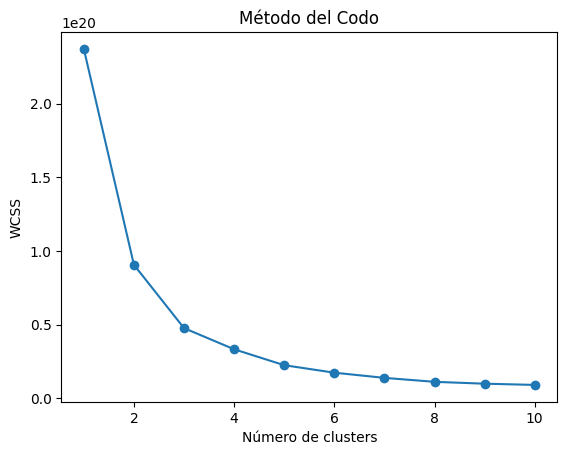

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df_numerical

number_of_clusters = range(1, 11)

wcss = []
for i in number_of_clusters:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(number_of_clusters, wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

#### Discución
Usamos la gráfica de codo para determinar el número óptimo de clusters en un análisis de K-means. Ya que sabemos que el punto donde cambia la pendiente es el número ideal de clusters, en nuestro caso podemos observar que la inercia baja drásticamente al principio a 2, 3, y 4 muy pronunciadamente, entonces podemos decir con seguridad que el número óptimo de custers que usaremos para trabajar es 3 ya que esta en medio.

### 1.4 Utilice los algoritmos k-medias y clustering jerárquico para agrupar. Compare los resultados generados por cada uno

#### KMedias

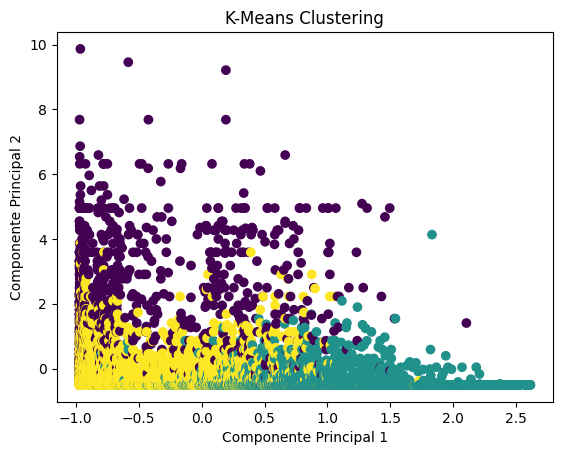

In [18]:

from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=["number"])

# Aplicar escaldo
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

k = 3 

kmeans = KMeans(n_clusters=k, random_state=42)
df["Cluster_KMeans"] = kmeans.fit_predict(df_scaled)  # Asignar etiquetas de cluster

# Visualizar los clusters (Para 2D usando PCA)
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=df["Cluster_KMeans"], cmap='viridis')
plt.title("K-Means Clustering")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

#### Clustering Jerárquico

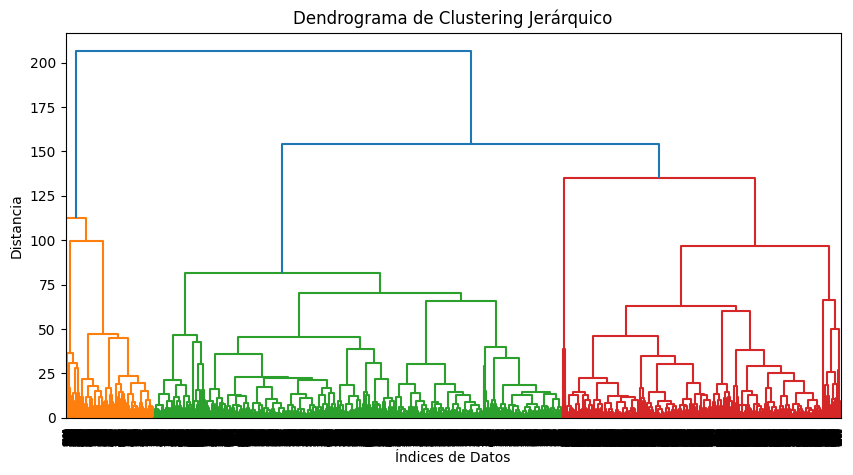

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [23]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Crear el dendrograma
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Índices de Datos")
plt.ylabel("Distancia")
plt.show()

# Aplicar el clustering jerárquico
hc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
df["Cluster_HC"] = hc.fit_predict(df_scaled)

# Visualizar los clusters (Para 2D usando PCA)
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=df["Cluster_HC"], cmap='rainbow')
plt.title("Clustering Jerárquico")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

#### Discución 
1. Kmeans
   - Fue muy rápido en generar la gráfica ya que es muy eficiente con grandes volúmenes de datos.
   - Los clusters están bien definidas usando esferas

2. Clustering jerárquico
   - Se tardó como 4 minútos en generar la gráfica
   - Es más fácil a la vista ver más detallada las relaciones entre datos

En resumen ambos algoritmos generaron gráficamente los 3 clusters que necesitamos aunque para nosotros nos gustó más el algoritmo de clustering jerárquico ya que se puede ver más fácil las distancias entre los datos  y se entiende mejor la relación entre los datos.
   

### Determine la calidad del agrupamiento hecho por cada algoritmo con el método de la silueta. Discuta los resultados.

In [24]:
print(df.columns)

from sklearn.metrics import silhouette_score

silhouette_kmeans = silhouette_score(df_scaled, df["Cluster_KMeans"])
silhouette_hc = silhouette_score(df_scaled, df["Cluster_HC"])

print(f"Puntuación de Silueta - K-Means: {silhouette_kmeans:.4f}")
print(f"Puntuación de Silueta - Clustering Jerárquico: {silhouette_hc:.4f}")


Index(['id', 'budget', 'genres', 'homePage', 'productionCompany',
       'productionCompanyCountry', 'productionCountry', 'revenue', 'runtime',
       'video', 'director', 'actors', 'actorsPopularity', 'actorsCharacter',
       'originalTitle', 'title', 'originalLanguage', 'popularity',
       'releaseDate', 'voteAvg', 'voteCount', 'genresAmount',
       'productionCoAmount', 'productionCountriesAmount', 'actorsAmount',
       'castWomenAmount', 'castMenAmount', 'Cluster_KMeans'],
      dtype='object')
